<a href="https://colab.research.google.com/github/Mvgrillo1357/Ai-Platform-Engineering/blob/master/sns_clustering/batch_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised Learning: Problem Statement 
# Teen Marketing Classification 
<b>Problem Statement</b> The many millions of teenage consumers using social networking sites have attracted the attention of marketers struggling to find an edge in an increasingly competitive market. One way to gain this edge is to identify segments of teenagers who share similar tastes, so that clients can avoid targeting advertisements to teens with no interest in the product being sold. Build K-means clustering model to classify the interest of teenagers by using various attributes. 

# Data Description 
The SNS dataset contains 30000 observations (rows) each represents a high school student and 40 features (columns) that provides information for the student. 

1 - Gradyear: Graduation year of the student (2006, 2007, 2008, 2009) 

2 - Gender: Gender of the student (male, female) 

3 - Age: Age of the student 

4 - Friends: No of friends For clustering

36 words were chosen to represent five categories of interests: namely extracurricular activities, fashion, religion, romance, and antisocial behaviour. The 36 words include terms such as football, sexy, kissed, bible, shopping, death, and drugs. 

The final dataset indicates, for each person, how many times each word appeared in the person’s SNS profile.
## Word list 
5 - basketball 6 - football 7 - soccer 8 - softball 9 - volleyball 10 - swimming 11 - cheerleading 12 - baseball 13 - tennis 14 - sports 15 - cute 16 - sex 17 - sexy 18 - hot 19 - kissed 20 - dance 21 - band 22 - marching 23 - music 24 - rock 25 - god 26 - church 27 - jesus 28 - bible 29 - hair 30 - dress 31 - Blonde 32 - mall 33 - shopping 34 - clothes 35 - hollister 36 - abercrombie 37 - die 38 - death 39 - drunk 40 - drugs 
# Evaluation
Evaluation will be based on: 

• Feature Selection

• Model Comparison 

• Cluster Selection 

# Feature Selection 

Select the right features based on importance and significance. 
# Model Comparison 
Use k-means to build multiple cluster. 
# Cluster Selection 
Select the cluster using the Elbow method. 
# Expected Output 
Model should be able to predict the cluster an observation belongs to. 


# imports


In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp
import sklearn as skl
from sklearn.cluster import KMeans
from shapely.ops import nearest_points
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, mean_squared_error
from collections import Counter
from sklearn.datasets import make_classification
!pip install imblearn
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
import pickle as plk
import math
import matplotlib as mpl
from sklearn.neighbors import NearestNeighbors
!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.metrics import hamming_loss
import scipy.stats as stats
!pip install researchpy
import researchpy as rp
import statsmodels.api as sma
from statsmodels.formula.api import ols
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import OneHotEncoder
from joblib import dump
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import RobustScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('/content/drive/My Drive/Copy of snsdata.csv')

#EDA

In [5]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [7]:
df.gender.value_counts(dropna=False)

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [0]:
df['gender'].fillna('Not Disclosed', inplace=True)

In [0]:
np_gender = np.array(df.gender)
np_gender = np.reshape(np_gender, (-1,1))
df.drop(['gender'], axis='columns', inplace=True)

In [10]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore', dtype=int)
np_gender = encoder.fit_transform(np_gender)
dump(encoder, 'encoder.joblib')

['encoder.joblib']

In [0]:
df_gender = pd.DataFrame(np_gender)
df_gender.columns = list(encoder.categories_[0])
df = pd.concat([df[df.columns[0]], df_gender[df_gender.columns], df[ df.columns[1:] ]], axis='columns')

In [12]:
df.head()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,1,0,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,1,0,0,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,0,1,0,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,1,0,0,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,0,0,1,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [13]:
df.age.value_counts(dropna=False)

NaN        5086
17.443       36
16.438       32
17.626       31
17.399       31
           ... 
14.935        1
8.318         1
34.418        1
101.437       1
20.235        1
Name: age, Length: 2215, dtype: int64

#df manipulation

In [14]:
df.describe()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,0.735133,0.174067,0.090800,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,0.441270,0.379173,0.287329,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,0.000000,0.000000,0.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,0.000000,0.000000,0.000000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,1.000000,0.000000,0.000000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,1.000000,0.000000,0.000000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,1.000000,1.000000,1.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


df will be for personal features as well as tweets, dfwords will be for purely tweet data

for age we will impute with the mean no factoring in null values 

In [15]:
for year in df.gradyear.unique():
    yearmean = df.age[df.gradyear == year].mean(skipna=True)
    df.age[df.gradyear == year] = df.age[df.gradyear == year].fillna(yearmean)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
df.describe()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,0.735133,0.174067,0.090800,17.982148,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,0.441270,0.379173,0.287329,7.169862,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,0.000000,0.000000,0.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,0.000000,0.000000,0.000000,16.504000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,1.000000,0.000000,0.000000,17.443000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,1.000000,0.000000,0.000000,18.391459,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,1.000000,1.000000,1.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


#df age analysis

In [17]:
df.corr()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
gradyear,1.000000,0.054053,-0.051739,-0.014735,-0.119312,0.066851,0.072767,0.025213,0.058298,0.046433,0.061452,0.038754,0.042809,0.027659,0.001096,0.042752,0.026937,-0.008041,0.041374,0.062598,0.020897,0.051868,0.003304,-0.016201,0.009963,0.044989,-0.011442,0.023325,0.008508,-0.008887,0.062714,-0.042158,0.010269,0.074370,0.042722,0.039899,0.060011,0.055192,0.014776,0.001536,-0.021476,0.008931
F,0.054053,1.000000,-0.764812,-0.526481,-0.029874,0.079484,0.000585,-0.079169,0.015657,0.100888,0.080311,0.054202,0.082295,-0.108479,-0.009213,-0.022262,0.141728,0.029846,0.057489,0.081820,0.047168,0.087485,0.000582,0.000160,0.046254,0.018616,0.025942,0.043742,-0.003184,-0.005347,0.110064,0.084502,0.019296,0.081110,0.193753,0.079273,0.045999,0.048254,0.011958,0.029695,0.026116,0.022345
M,-0.051739,-0.764812,1.000000,-0.145077,0.020903,-0.066015,0.027420,0.127689,-0.006353,-0.094341,-0.077816,-0.048436,-0.087487,0.146606,0.014106,0.058243,-0.143960,-0.019992,-0.051154,-0.071576,-0.039856,-0.086677,0.021176,0.013470,-0.016635,0.006140,-0.012880,-0.028874,0.010245,0.013574,-0.101180,-0.081856,-0.017635,-0.080106,-0.192767,-0.074117,-0.049142,-0.046603,-0.004275,-0.010572,-0.014617,-0.007018
Not Disclosed,-0.014735,-0.526481,-0.145077,1.000000,0.018295,-0.034952,-0.037083,-0.046920,-0.015661,-0.030444,-0.020648,-0.019322,-0.010933,-0.026871,-0.004465,-0.042672,-0.027685,-0.019455,-0.020784,-0.031200,-0.019843,-0.019974,-0.028839,-0.018021,-0.049084,-0.036693,-0.022843,-0.029073,-0.008630,-0.009701,-0.035511,-0.021754,-0.006361,-0.018853,-0.043173,-0.023936,-0.005793,-0.012607,-0.012723,-0.031652,-0.020818,-0.025055
age,-0.119312,-0.029874,0.020903,0.018295,1.000000,-0.015052,-0.020645,-0.015611,-0.009469,-0.016753,-0.016147,-0.004912,-0.018782,-0.011554,0.003626,-0.017868,-0.012249,-0.000059,-0.010283,-0.017224,-0.009292,-0.018134,-0.000709,0.000071,-0.000072,-0.001985,0.002794,0.010914,0.012523,0.001242,-0.017613,-0.005931,-0.002446,-0.020558,-0.027178,-0.021049,-0.008928,-0.012264,0.002905,-0.001087,0.000782,-0.001534
friends,0.066851,0.079484,-0.066015,-0.034952,-0.015052,1.000000,0.053052,0.031738,0.027402,0.055935,0.046853,0.029147,0.054851,0.027419,0.008818,0.014868,0.069577,0.000374,0.031890,0.044193,0.018776,0.051955,0.015396,0.013910,0.028792,0.020261,0.046406,0.056025,0.029807,0.011099,0.033285,0.040673,0.008502,0.066716,0.084627,0.026906,0.056240,0.057502,0.010432,0.026358,0.017036,-0.006960
basketball,0.072767,0.000585,0.027420,-0.037083,-0.020645,0.053052,1.000000,0.177333,0.071375,0.123884,0.136199,0.025810,0.041059,0.125802,0.036987,0.165710,0.040813,0.043604,0.030631,0.035072,0.064847,0.053738,0.010042,-0.004417,0.059028,0.084040,0.027179,0.056308,0.011552,0.019818,0.098283,0.032171,0.018204,0.069477,0.073422,0.076253,0.036633,0.033880,0.020331,0.017815,0.021744,0.031330
football,0.025213,-0.079169,0.127689,-0.046920,-0.015611,0.031738,0.177333,1.000000,0.063986,0.046312,0.058534,0.035534,0.088658,0.183679,0.031902,0.154553,0.069626,0.056704,0.029369,0.046827,0.065681,0.059671,0.043142,0.016741,0.066126,0.090284,0.032514,0.047236,0.013142,0.006588,0.104103,0.043543,0.033070,0.065207,0.056572,0.070793,0.063667,0.041708,0.023424,0.018757,0.038740,0.031675
soccer,0.058298,0.015657,-0.006353,-0.015661,-0.009469,0.027402,0.071375,0.063986,1.000000,0.012366,0.029045,0.039001,0.014794,0.033696,0.028848,0.089538,0.033346,0.014025,0.015299,0.032686,0.027208,0.010523,0.004735,-0.007511,0.029863,0.050642,0.002689,0.028171,0.007313,0.005581,0.049187,0.009979,0.015134,0.022723,0.054580,0.022189,0.029353,0.022757,0.008942,0.004957,0.009390,0.014844
softball,0.046433,0.100888,-0.094341,-0.030444,-0.016753,0.055935,0.123884,0.046312,0.012366,1.000000,0.

In [18]:
df.groupby('gradyear').mean()

,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
gradyear,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,0.698000,0.204800,0.097200,19.137241,25.861333,0.195733,0.224400,0.149867,0.112133,0.091467,0.108267,0.072267,0.089867,0.082000,0.111200,0.286267,0.220667,0.111600,0.084533,0.078400,0.348933,0.287467,0.044133,0.710667,0.204133,0.478800,0.222133,0.109200,0.024267,0.322533,0.135867,0.057200,0.182000,0.307867,0.118933,0.043867,0.032000,0.161200,0.112133,0.098267,0.053733
2007,0.728400,0.179333,0.092267,18.391459,30.738133,0.232800,0.239867,0.207333,0.141867,0.124667,0.124133,0.104267,0.092933,0.090533,0.133200,0.322533,0.206533,0.132667,0.111200,0.108267,0.391467,0.306933,0.044133,0.732800,0.226267,0.479867,0.241067,0.105467,0.021867,0.391600,0.128000,0.115333,0.239067,0.342800,0.146533,0.060267,0.042400,0.194000,0.116933,0.091867,0.060133
2008,0.753333,0.159067,0.087600,17.523867,31.095200,0.289333,0.281333,0.233200,0.193467,0.159200,0.143733,0.116000,0.109600,0.094400,0.149733,0.336667,0.221733,0.149333,0.149467,0.119867,0.451600,0.304800,0.043733,0.773600,0.250133,0.464400,0.253467,0.111733,0.019600,0.476667,0.086933,0.102133,0.288667,0.370400,0.156800,0.074000,0.057200,0.191733,0.112133,0.087600,0.067333
2009,0.760800,0.153067,0.086133,16.876025,33.023200,0.351467,0.263600,0.300667,0.197333,0.197200,0.161467,0.134000,0.127333,0.082400,0.165733,0.346000,0.188667,0.171200,0.161200,0.106267,0.508667,0.299200,0.030400,0.734267,0.292800,0.438133,0.276000,0.121867,0.019600,0.499467,0.093067,0.121067,0.319733,0.390933,0.171733,0.101333,0.073067,0.189467,0.115733,0.074133,0.060533


In [0]:
lm=ols('age ~ gradyear', data=df).fit()

In [0]:
table=sma.stats.anova_lm(lm)

In [21]:
table

,df,sum_sq,mean_sq,F,PR(>F)
gradyear,1.0,2.195306e+04,21953.059760,433.19729,1.551865e-95
Residual,29998.0,1.520203e+06,50.676817,NaN,NaN


We used ANOVA and correlation analysis to see if graduation year affects age. Due to the fact that we reject the null hypothesis by such a high margin we can proceed to test age to see if we can find a point of convergence.

#df2= df where age is dropped

In [0]:
df2=df.drop('age', axis='columns').copy()

In [23]:
df2

,gradyear,F,M,Not Disclosed,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,0,1,0,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,0,0,1,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,2009,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,2009,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,2009,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#dfwords manipulation

In [24]:
dfwords=df.loc[:,'basketball':].copy()
dfwords

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
scaler=StandardScaler()

In [0]:
words=scaler.fit_transform(dfwords)

In [27]:
words

array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [28]:
dfwordsscaled=pd.DataFrame(words, columns=dfwords.columns)
dfwordsscaled.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


In [29]:
dfwordsscaled.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2.704052e-14,-2.330839e-16,1.003252e-14,4.090942e-15,1.402178e-14,1.550438e-15,-1.042129e-16,-2.791499e-15,8.804790e-16,-3.902316e-15,8.368073e-15,7.804627e-16,5.210192e-15,-1.856775e-14,-4.411682e-15,-1.849220e-14,-3.621399e-16,-4.247832e-15,-2.998890e-15,3.552965e-15,1.801611e-15,1.967911e-15,1.902004e-15,3.451757e-16,1.532770e-15,9.749116e-15,-9.736022e-16,-2.112029e-14,-1.183242e-14,-1.432802e-14,-3.393087e-14,-1.677602e-14,-3.443779e-15,-3.203401e-16,1.261689e-15,-1.083258e-15
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,2.093406e-01,-3.377929e-01,3.980781e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,1.729137e+01,3.046682e+01,2.884728e+01,2.517666e+01,2.202956e+01,1.012836e+02,3.381064e+01,2.060662e+01,5.084490e+01,2.543952e+01,5.872572e+01,3.817464e+01,5.051496e+01,2.881419e+01,5.846820e+01,

In [30]:
dfwords.sum()

basketball       8020
football         7569
soccer           6683
softball         4836
volleyball       4294
swimming         4032
cheerleading     3199
baseball         3148
tennis           2620
sports           4199
cute             9686
sex              6282
sexy             4236
hot              3798
kissed           3096
dance           12755
band             8988
marching         1218
music           22135
rock             7300
god             13959
church           7445
jesus            3362
bible             640
hair            12677
dress            3329
blonde           2968
mall             7721
shopping        10590
clothes          4455
hollister        2096
abercrombie      1535
die              5523
death            3427
drunk            2639
drugs            1813
dtype: int64

#Modeling

In [0]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(2, 14):
  kme = KMeans(
      n_clusters=i, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )
  kme.fit(dfwordsscaled)
  distortions.append(kme.inertia_)
#inertia_ is sum of squared distances of samples to their closest cluster center.


https://en.wikipedia.org/wiki/K-means%2B%2B

Explanation for kmeans++

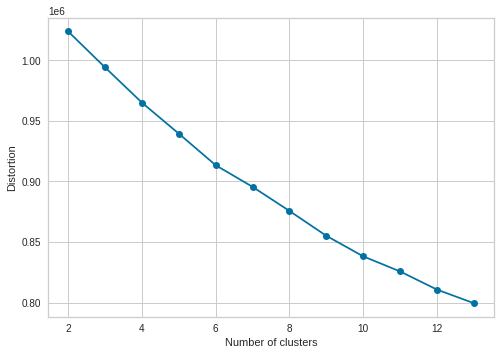

In [32]:
# plot
plt.plot(range(2, 14), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [33]:
#Use silhouette score
range_n_clusters = list (range(2,14))
print ("Number of clusters from 2 to 14: \n", range_n_clusters)

Number of clusters from 2 to 14: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [34]:
for n_clusters in range_n_clusters:
    kme
    preds = kme.fit_predict(dfwordsscaled)
    centers = kme.cluster_centers_

    score = silhouette_score(dfwordsscaled, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.24478589183107424)
For n_clusters = 3, silhouette score is 0.24478589183107424)
For n_clusters = 4, silhouette score is 0.24478589183107424)
For n_clusters = 5, silhouette score is 0.24478589183107424)
For n_clusters = 6, silhouette score is 0.24478589183107424)
For n_clusters = 7, silhouette score is 0.24478589183107424)
For n_clusters = 8, silhouette score is 0.24478589183107424)
For n_clusters = 9, silhouette score is 0.24478589183107424)
For n_clusters = 10, silhouette score is 0.24478589183107424)
For n_clusters = 11, silhouette score is 0.24478589183107424)
For n_clusters = 12, silhouette score is 0.24478589183107424)
For n_clusters = 13, silhouette score is 0.24478589183107424)


It appears we are having difficulties reaching a convergence point so therefore we may want to revisit df with personal features.

#df2 scaling

In [0]:
scaled=scaler.fit_transform(df2)

In [36]:
scaled

array([[-1.34164079, -1.66597855,  2.17828495, ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-1.34164079,  0.60024783, -0.45907676, ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-1.34164079, -1.66597855,  2.17828495, ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [ 1.34164079, -1.66597855,  2.17828495, ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 1.34164079, -1.66597855,  2.17828495, ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 1.34164079,  0.60024783, -0.45907676, ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [37]:
dfscaled=pd.DataFrame(scaled, columns=df2.columns)
dfscaled.head()

,gradyear,F,M,Not Disclosed,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-1.341641,-1.665979,2.178285,-0.316019,-0.634528,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,-1.341641,0.600248,-0.459077,-0.316019,-0.826150,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,-1.341641,-1.665979,2.178285,-0.316019,1.062695,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,-1.341641,0.600248,-0.459077,-0.316019,-0.826150,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,-1.341641,-1.665979,-0.459077,3.164367,-0.552404,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


In [38]:
dfscaled.describe()

,gradyear,F,M,Not Disclosed,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-4.574119e-18,-1.036497e-14,2.638138e-15,-5.519104e-16,2.191306e-15,2.704052e-14,-2.330839e-16,1.003252e-14,4.090942e-15,1.402178e-14,1.550438e-15,-1.042129e-16,-2.791499e-15,8.804790e-16,-3.902316e-15,8.368073e-15,7.804627e-16,5.210192e-15,-1.856775e-14,-4.411682e-15,-1.849220e-14,-3.621399e-16,-4.247832e-15,-2.998890e-15,3.552965e-15,1.801611e-15,1.967911e-15,1.902004e-15,3.451757e-16,1.532770e-15,9.749116e-15,-9.736022e-16,-2.112029e-14,-1.183242e-14,-1.432802e-14,-3.393087e-14,-1.677602e-14,-3.443779e-15,-3.203401e-16,1.261689e-15,-1.083258e-15
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-1.341641e+00,-1.665979e+00,-4.590768e-01,-3.160190e-01,-8.261496e-01,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,-6.708204e-01,-1.665979e+00,-4.590768e-01,-3.160190e-01,-7.440259e-01,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,0.000000e+00,6.002478e-01,-4.590768e-01,-3.160190e-01,-2.786584e-01,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,6.708204e-01,6.002478e-01,-4.590768e-01,-3.160190e-01,3.783310e-01,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,2.093406e-01,-3.37

In [0]:
# calculate distortion for a range of number of cluster
distortions2 = []
for i in range(2, 14):
  kmea = KMeans(
      n_clusters=i, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )
  kmea.fit(dfscaled)
  distortions2.append(kmea.inertia_)
#inertia_ is sum of squared distances of samples to their closest cluster center.


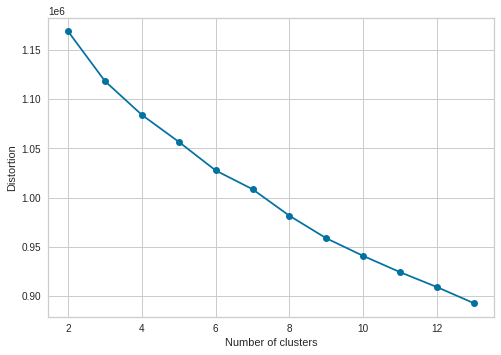

In [40]:
# plot
plt.plot(range(2, 14), distortions2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#dfscale

In [0]:
scale=scaler.fit_transform(df)

In [42]:
scale

array([[-1.34164079, -1.66597855,  2.17828495, ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-1.34164079,  0.60024783, -0.45907676, ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-1.34164079, -1.66597855,  2.17828495, ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [ 1.34164079, -1.66597855,  2.17828495, ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 1.34164079, -1.66597855,  2.17828495, ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 1.34164079,  0.60024783, -0.45907676, ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [43]:
dfscale=pd.DataFrame(scale, columns=df.columns)
dfscale.head()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,-1.341641,-1.665979,2.178285,-0.316019,0.139454,-0.634528,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,0.494457,-0.267795,-0.141421,-0.589161,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,-1.341641,0.600248,-0.459077,-0.316019,0.114209,-0.826150,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,1.007842,2.438587,0.398078,-0.297557,-0.192654,-0.104247,5.079910,8.653277,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,-1.341641,-1.665979,2.178285,-0.316019,0.049214,1.062695,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,1.519887,-0.141421,0.209341,-0.337793,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,-1.341641,0.600248,-0.459077,-0.316019,0.124531,-0.826150,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,0.843856,-0.186384,-0.267323,-0.264225,-0.202619,-0.365718,-0.267795,-0.141421,-0.589161,1.050397,-0.346411,-0.297557,-0.192654,-0.104247,-0.384873,-0.246906,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,-1.341641,-1.665979,-0.459077,3.164367,0.141268,-0.552404,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,-0.207327,-0.201131,-0.168939,-0.297123,-0.402362,0.703703,-0.267323,-0.264225,9.614211,0.494457,0.626046,-0.141421,1.806344,-0.337793,0.398078,-0.297557,-0.192654,-0.104247,0.525925,-0.246906,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316


In [44]:
dfscale.corr()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
gradyear,1.000000,0.054053,-0.051739,-0.014735,-0.119312,0.066851,0.072767,0.025213,0.058298,0.046433,0.061452,0.038754,0.042809,0.027659,0.001096,0.042752,0.026937,-0.008041,0.041374,0.062598,0.020897,0.051868,0.003304,-0.016201,0.009963,0.044989,-0.011442,0.023325,0.008508,-0.008887,0.062714,-0.042158,0.010269,0.074370,0.042722,0.039899,0.060011,0.055192,0.014776,0.001536,-0.021476,0.008931
F,0.054053,1.000000,-0.764812,-0.526481,-0.029874,0.079484,0.000585,-0.079169,0.015657,0.100888,0.080311,0.054202,0.082295,-0.108479,-0.009213,-0.022262,0.141728,0.029846,0.057489,0.081820,0.047168,0.087485,0.000582,0.000160,0.046254,0.018616,0.025942,0.043742,-0.003184,-0.005347,0.110064,0.084502,0.019296,0.081110,0.193753,0.079273,0.045999,0.048254,0.011958,0.029695,0.026116,0.022345
M,-0.051739,-0.764812,1.000000,-0.145077,0.020903,-0.066015,0.027420,0.127689,-0.006353,-0.094341,-0.077816,-0.048436,-0.087487,0.146606,0.014106,0.058243,-0.143960,-0.019992,-0.051154,-0.071576,-0.039856,-0.086677,0.021176,0.013470,-0.016635,0.006140,-0.012880,-0.028874,0.010245,0.013574,-0.101180,-0.081856,-0.017635,-0.080106,-0.192767,-0.074117,-0.049142,-0.046603,-0.004275,-0.010572,-0.014617,-0.007018
Not Disclosed,-0.014735,-0.526481,-0.145077,1.000000,0.018295,-0.034952,-0.037083,-0.046920,-0.015661,-0.030444,-0.020648,-0.019322,-0.010933,-0.026871,-0.004465,-0.042672,-0.027685,-0.019455,-0.020784,-0.031200,-0.019843,-0.019974,-0.028839,-0.018021,-0.049084,-0.036693,-0.022843,-0.029073,-0.008630,-0.009701,-0.035511,-0.021754,-0.006361,-0.018853,-0.043173,-0.023936,-0.005793,-0.012607,-0.012723,-0.031652,-0.020818,-0.025055
age,-0.119312,-0.029874,0.020903,0.018295,1.000000,-0.015052,-0.020645,-0.015611,-0.009469,-0.016753,-0.016147,-0.004912,-0.018782,-0.011554,0.003626,-0.017868,-0.012249,-0.000059,-0.010283,-0.017224,-0.009292,-0.018134,-0.000709,0.000071,-0.000072,-0.001985,0.002794,0.010914,0.012523,0.001242,-0.017613,-0.005931,-0.002446,-0.020558,-0.027178,-0.021049,-0.008928,-0.012264,0.002905,-0.001087,0.000782,-0.001534
friends,0.066851,0.079484,-0.066015,-0.034952,-0.015052,1.000000,0.053052,0.031738,0.027402,0.055935,0.046853,0.029147,0.054851,0.027419,0.008818,0.014868,0.069577,0.000374,0.031890,0.044193,0.018776,0.051955,0.015396,0.013910,0.028792,0.020261,0.046406,0.056025,0.029807,0.011099,0.033285,0.040673,0.008502,0.066716,0.084627,0.026906,0.056240,0.057502,0.010432,0.026358,0.017036,-0.006960
basketball,0.072767,0.000585,0.027420,-0.037083,-0.020645,0.053052,1.000000,0.177333,0.071375,0.123884,0.136199,0.025810,0.041059,0.125802,0.036987,0.165710,0.040813,0.043604,0.030631,0.035072,0.064847,0.053738,0.010042,-0.004417,0.059028,0.084040,0.027179,0.056308,0.011552,0.019818,0.098283,0.032171,0.018204,0.069477,0.073422,0.076253,0.036633,0.033880,0.020331,0.017815,0.021744,0.031330
football,0.025213,-0.079169,0.127689,-0.046920,-0.015611,0.031738,0.177333,1.000000,0.063986,0.046312,0.058534,0.035534,0.088658,0.183679,0.031902,0.154553,0.069626,0.056704,0.029369,0.046827,0.065681,0.059671,0.043142,0.016741,0.066126,0.090284,0.032514,0.047236,0.013142,0.006588,0.104103,0.043543,0.033070,0.065207,0.056572,0.070793,0.063667,0.041708,0.023424,0.018757,0.038740,0.031675
soccer,0.058298,0.015657,-0.006353,-0.015661,-0.009469,0.027402,0.071375,0.063986,1.000000,0.012366,0.029045,0.039001,0.014794,0.033696,0.028848,0.089538,0.033346,0.014025,0.015299,0.032686,0.027208,0.010523,0.004735,-0.007511,0.029863,0.050642,0.002689,0.028171,0.007313,0.005581,0.049187,0.009979,0.015134,0.022723,0.054580,0.022189,0.029353,0.022757,0.008942,0.004957,0.009390,0.014844
softball,0.046433,0.100888,-0.094341,-0.030444,-0.016753,0.055935,0.123884,0.046312,0.012366,1.000000,0.

In [0]:
# calculate distortion for a range of number of cluster
distortions3 = []
for i in range(2, 14):
  kmean = KMeans(
      n_clusters=i, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )
  kmean.fit(dfscale)
  distortions3.append(kmean.inertia_)
#inertia_ is sum of squared distances of samples to their closest cluster center.


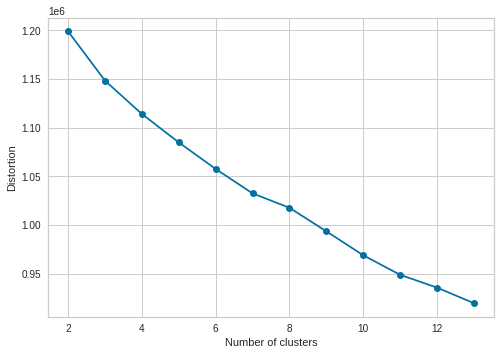

In [46]:
# plot
plt.plot(range(2, 14), distortions3, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#Min Max Scaler (this scaler had better results)

In [0]:
scalermin=MinMaxScaler()

#df min max scaled

In [48]:
minscale=scalermin.fit_transform(df)
minscale

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
dfmin=pd.DataFrame(minscale, columns=df.columns)
dfmin.head()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.0,0.0,1.0,0.0,0.153080,0.008434,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
1,0.0,1.0,0.0,0.0,0.151337,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031250,0.095238,0.012658,0.0,0.0,0.0,0.162162,0.444444,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
2,0.0,0.0,1.0,0.0,0.146850,0.083133,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030303,0.0,0.015625,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000
3,0.0,1.0,0.0,0.0,0.152050,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.047619,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
4,0.0,0.0,0.0,1.0,0.153205,0.012048,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008772,0.0,0.0,0.192308,0.033333,0.015152,0.0,0.046875,0.000000,0.012658,0.0,0.0,0.0,0.027027,0.000000,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625


In [50]:
dfmin.describe()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,0.500000,0.735133,0.174067,0.090800,0.143452,0.036361,0.011139,0.016820,0.008251,0.009482,0.010224,0.004335,0.011848,0.006558,0.005822,0.011664,0.017937,0.001837,0.007844,0.012660,0.003969,0.014172,0.004539,0.003691,0.011529,0.011587,0.005890,0.005640,0.003736,0.001939,0.011421,0.012330,0.000303,0.021447,0.032091,0.018562,0.007763,0.006396,0.008368,0.00816,0.010996,0.003777
std,0.372684,0.441270,0.379173,0.287329,0.069047,0.044013,0.033529,0.047024,0.033971,0.043512,0.045710,0.016677,0.057148,0.032608,0.034464,0.039257,0.044580,0.009855,0.029345,0.047915,0.019590,0.038752,0.016951,0.026099,0.019568,0.034304,0.017003,0.018955,0.019390,0.018604,0.029675,0.049937,0.005940,0.057980,0.065854,0.059080,0.038531,0.034944,0.028387,0.03120,0.049891,0.021595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.250000,0.000000,0.000000,0.000000,0.129217,0.003614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,1.000000,0.000000,0.000000,0.138259,0.024096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.750000,1.000000,0.000000,0.000000,0.147393,0.053012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [0]:
# calculate distortion for a range of number of cluster
distortionsm = []
for i in range(2, 14):
  kmm = KMeans(
      n_clusters=i, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )
  kmm.fit(dfmin)
  distortionsm.append(kmm.inertia_)
#inertia_ is sum of squared distances of samples to their closest cluster center.


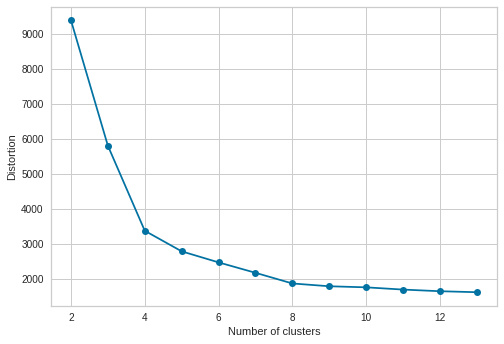

In [52]:
# plot
plt.plot(range(2, 14), distortionsm, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

This is a great result!

In [53]:
#Use silhouette score
range_n_clusters = list (range(2,14))
print ("Number of clusters from 2 to 14: \n", range_n_clusters)

Number of clusters from 2 to 14: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [54]:
for n_clusters in range_n_clusters:
    kmm
    preds1 = kmm.fit_predict(dfmin)
    centers1 = kmm.cluster_centers_

    score = silhouette_score(dfmin, preds1)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39594434198521644)
For n_clusters = 3, silhouette score is 0.39594434198521644)
For n_clusters = 4, silhouette score is 0.39594434198521644)
For n_clusters = 5, silhouette score is 0.39594434198521644)
For n_clusters = 6, silhouette score is 0.39594434198521644)
For n_clusters = 7, silhouette score is 0.39594434198521644)
For n_clusters = 8, silhouette score is 0.39594434198521644)
For n_clusters = 9, silhouette score is 0.39594434198521644)
For n_clusters = 10, silhouette score is 0.39594434198521644)
For n_clusters = 11, silhouette score is 0.39594434198521644)
For n_clusters = 12, silhouette score is 0.39594434198521644)
For n_clusters = 13, silhouette score is 0.39594434198521644)


It turns out that the Min Max scaler is a better option for finding convergence. let's test it out on the previous tests

#dfwords min max scaled

In [55]:
dfwords.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [56]:
wordsult=scalermin.fit_transform(dfwords)
wordsult

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:
dfwordsultscaled=pd.DataFrame(wordsult, columns=dfwords.columns)
dfwordsultscaled.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
1,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031250,0.095238,0.012658,0.0,0.0,0.0,0.162162,0.444444,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
2,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030303,0.0,0.015625,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.047619,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008772,0.0,0.0,0.192308,0.033333,0.015152,0.0,0.046875,0.000000,0.012658,0.0,0.0,0.0,0.027027,0.000000,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625


In [58]:
dfwordsultscaled.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,0.011139,0.016820,0.008251,0.009482,0.010224,0.004335,0.011848,0.006558,0.005822,0.011664,0.017937,0.001837,0.007844,0.012660,0.003969,0.014172,0.004539,0.003691,0.011529,0.011587,0.005890,0.005640,0.003736,0.001939,0.011421,0.012330,0.000303,0.021447,0.032091,0.018562,0.007763,0.006396,0.008368,0.00816,0.010996,0.003777
std,0.033529,0.047024,0.033971,0.043512,0.045710,0.016677,0.057148,0.032608,0.034464,0.039257,0.044580,0.009855,0.029345,0.047915,0.019590,0.038752,0.016951,0.026099,0.019568,0.034304,0.017003,0.018955,0.019390,0.018604,0.029675,0.049937,0.005940,0.057980,0.065854,0.059080,0.038531,0.034944,0.028387,0.03120,0.049891,0.021595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [0]:
# calculate distortion for a range of number of cluster
distortionswords = []
for i in range(2, 14):
  kmw = KMeans(
      n_clusters=i, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )
  kmw.fit(dfwordsultscaled)
  distortionswords.append(kmw.inertia_)
#inertia_ is sum of squared distances of samples to their closest cluster center.


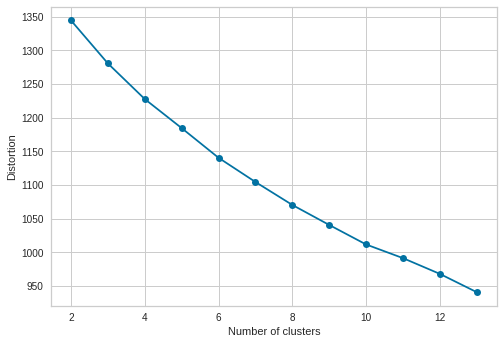

In [60]:
# plot
plt.plot(range(2, 14), distortionswords, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#dfwords MaxAbsScaler

In [0]:
ascaler= MaxAbsScaler()

In [62]:
abswords=ascaler.fit_transform(dfwords)
abswords

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
dfabs=pd.DataFrame(abswords, columns= dfwords.columns)
dfabs

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
1,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031250,0.095238,0.012658,0.0,0.0,0.0,0.162162,0.444444,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
2,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030303,0.0,0.015625,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000
3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.047619,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.008772,0.0,0.0,0.192308,0.033333,0.015152,0.0,0.046875,0.000000,0.012658,0.0,0.0,0.0,0.027027,0.000000,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
29996,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
29997,0.000000,0.066667,0.0,0.000000,0.0,0.0,0.0,0.0625,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000
29998,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.047619,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000


In [64]:
dfabs.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,0.011139,0.016820,0.008251,0.009482,0.010224,0.004335,0.011848,0.006558,0.005822,0.011664,0.017937,0.001837,0.007844,0.012660,0.003969,0.014172,0.004539,0.003691,0.011529,0.011587,0.005890,0.005640,0.003736,0.001939,0.011421,0.012330,0.000303,0.021447,0.032091,0.018562,0.007763,0.006396,0.008368,0.00816,0.010996,0.003777
std,0.033529,0.047024,0.033971,0.043512,0.045710,0.016677,0.057148,0.032608,0.034464,0.039257,0.044580,0.009855,0.029345,0.047915,0.019590,0.038752,0.016951,0.026099,0.019568,0.034304,0.017003,0.018955,0.019390,0.018604,0.029675,0.049937,0.005940,0.057980,0.065854,0.059080,0.038531,0.034944,0.028387,0.03120,0.049891,0.021595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [0]:
# calculate distortion for a range of number of cluster
distortionsa = []
for i in range(2, 14):
  kma = KMeans(
      n_clusters=i, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )
  kma.fit(dfabs)
  distortionsa.append(kma.inertia_)
#inertia_ is sum of squared distances of samples to their closest cluster center.


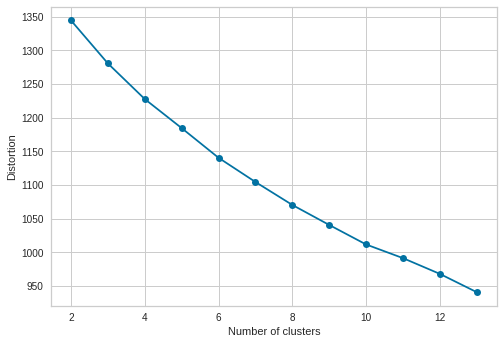

In [66]:
# plot
plt.plot(range(2, 14), distortionsa, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [67]:
#Use silhouette score
range_n_clusters = list (range(2,14))
print ("Number of clusters from 2 to 14: \n", range_n_clusters)

Number of clusters from 2 to 14: 
 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [68]:
for n_clusters in range_n_clusters:
    kma
    predsa = kma.fit_predict(dfwords)
    centersa = kma.cluster_centers_

    score = silhouette_score(dfwords, predsa)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1882838065990684)
For n_clusters = 3, silhouette score is 0.1882838065990684)
For n_clusters = 4, silhouette score is 0.1882838065990684)
For n_clusters = 5, silhouette score is 0.1882838065990684)
For n_clusters = 6, silhouette score is 0.1882838065990684)
For n_clusters = 7, silhouette score is 0.1882838065990684)
For n_clusters = 8, silhouette score is 0.1882838065990684)
For n_clusters = 9, silhouette score is 0.1882838065990684)
For n_clusters = 10, silhouette score is 0.1882838065990684)
For n_clusters = 11, silhouette score is 0.1882838065990684)
For n_clusters = 12, silhouette score is 0.1882838065990684)
For n_clusters = 13, silhouette score is 0.1882838065990684)


#df words no scaler


In [0]:
# calculate distortion for a range of number of cluster
distortionsw = []
for i in range(2, 14):
  k = KMeans(
      n_clusters=i, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )
  k.fit(dfabs)
  distortionsw.append(k.inertia_)
#inertia_ is sum of squared distances of samples to their closest cluster center.


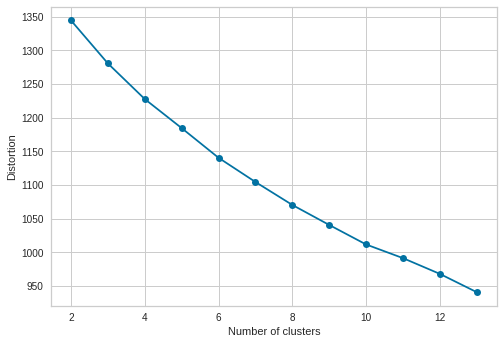

In [70]:
# plot
plt.plot(range(2, 14), distortionsw, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#df min max scaled testing optimal k values of 4,5,6

In [0]:
kmmult = KMeans(
      n_clusters=4, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )

In [72]:
kmmult.fit(dfmin)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [73]:
kmmult.labels_

array([0, 1, 0, ..., 0, 0, 2], dtype=int32)

In [0]:
dfmin4=dfmin.copy()

In [0]:
dfmin4['cluster']=kmmult.labels_

In [76]:
dfmin4.head()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,0.0,0.0,1.0,0.0,0.153080,0.008434,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,0
1,0.0,1.0,0.0,0.0,0.151337,0.000000,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031250,0.095238,0.012658,0.0,0.0,0.0,0.162162,0.444444,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,1
2,0.0,0.0,1.0,0.0,0.146850,0.083133,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030303,0.0,0.015625,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,0
3,0.0,1.0,0.0,0.0,0.152050,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.047619,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,1
4,0.0,0.0,0.0,1.0,0.153205,0.012048,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008772,0.0,0.0,0.192308,0.033333,0.015152,0.0,0.046875,0.000000,0.012658,0.0,0.0,0.0,0.027027,0.000000,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,3


In [77]:
dfmin4.cluster.value_counts()

2    11356
1    10698
0     5222
3     2724
Name: cluster, dtype: int64

now for 5 clusters

In [0]:
kmmult2 = KMeans(
      n_clusters=5, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )

In [79]:
kmmult2.fit(dfmin)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [80]:
kmmult2.labels_

array([0, 1, 0, ..., 4, 4, 2], dtype=int32)

In [0]:
dfmin5=dfmin.copy()

In [0]:
dfmin5['cluster']=kmmult2.labels_

In [83]:
dfmin5.cluster.value_counts()

2    11356
1    10698
0     2881
3     2724
4     2341
Name: cluster, dtype: int64

now for 6 clusters

In [0]:
kmmult3= KMeans(
      n_clusters=6, init='k-means++', n_jobs=-1, max_iter=500,  
      random_state=0, algorithm="full"
  )

In [85]:
kmmult3.fit(dfmin)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [86]:
kmmult3.labels_

array([4, 0, 4, ..., 1, 1, 3], dtype=int32)

In [0]:
dfmin6=dfmin.copy()

In [0]:
dfmin6['cluster']=kmmult3.labels_

In [89]:
dfmin6.cluster.value_counts()

0    10698
3     5706
5     5650
4     2881
2     2724
1     2341
Name: cluster, dtype: int64

based on our testing we have decided to preceed with 4 clusters

#4 cluster km w/ personal details interpretation

In [90]:
dfmin4.groupby('cluster').mean()

,gradyear,F,M,Not Disclosed,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.457998,0.0,1.0,0.0,0.146595,0.030032,0.013142,0.029899,0.007780,0.000541,0.002476,0.002576,0.000957,0.016971,0.006881,0.016644,0.003958,0.001408,0.004575,0.005190,0.002269,0.006856,0.005321,0.004457,0.010820,0.012046,0.005413,0.004448,0.004168,0.002489,0.004881,0.003426,0.000074,0.011330,0.004439,0.009024,0.003638,0.002849,0.008104,0.007441,0.009407,0.003447
1,0.170219,1.0,0.0,0.0,0.149972,0.035756,0.008970,0.013448,0.006675,0.009903,0.009374,0.004209,0.012630,0.003792,0.005422,0.009550,0.021110,0.002114,0.007639,0.012180,0.004174,0.014352,0.004500,0.003900,0.011823,0.010581,0.006421,0.005802,0.003596,0.002073,0.011636,0.018342,0.000346,0.020004,0.037569,0.019244,0.006689,0.005457,0.008039,0.008793,0.012666,0.003943
2,0.834155,1.0,0.0,0.0,0.134904,0.041008,0.013205,0.015657,0.010355,0.014203,0.015303,0.005508,0.016594,0.005041,0.005830,0.012636,0.022313,0.001919,0.010005,0.017682,0.004853,0.017955,0.004588,0.003498,0.012306,0.013280,0.005903,0.006454,0.003795,0.001697,0.015025,0.011585,0.000396,0.028289,0.041804,0.023380,0.010841,0.009246,0.009074,0.008642,0.010941,0.004183
3,0.482624,0.0,0.0,1.0,0.147449,0.031493,0.007204,0.009838,0.006567,0.005291,0.007237,0.003316,0.009871,0.003786,0.005335,0.006363,0.014032,0.001230,0.005915,0.007930,0.002739,0.011723,0.002992,0.002203,0.008489,0.007604,0.004661,0.003896,0.003206,0.001368,0.008086,0.008892,0.000183,0.017988,0.023094,0.014088,0.007057,0.005002,0.007225,0.005035,0.007709,0.002065


In [91]:
dfmin4.groupby('cluster').describe()

gradyear                                ... drugs                  
           count      mean       std       min  ...   25%  50%  75%     max
cluster                                         ...                        
0         5222.0  0.457998  0.374510  0.000000  ...   0.0  0.0  0.0  0.6250
1        10698.0  0.170219  0.166637  0.000000  ...   0.0  0.0  0.0  1.0000
2        11356.0  0.834155  0.166672  0.666667  ...   0.0  0.0  0.0  0.4375
3         2724.0  0.482624  0.373763  0.000000  ...   0.0  0.0  0.0  0.3125

[4 rows x 336 columns]

#Df Words analysis of what words are important

In [92]:
dfwords

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
#Silhouette score
range_n_clusters = list (range(2,18))
Silhouette=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    predsw = clusterer.fit_predict(dfwords)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dfwords, predsw, random_state=0)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    Silhouette.append(score)



For n_clusters = 2, silhouette score is 0.9846545050532218)
For n_clusters = 3, silhouette score is 0.41863401333924877)
For n_clusters = 4, silhouette score is 0.41140357038269076)
For n_clusters = 5, silhouette score is 0.3674726867584091)
For n_clusters = 6, silhouette score is 0.21925334280673367)
For n_clusters = 7, silhouette score is 0.21487021070034187)
For n_clusters = 8, silhouette score is 0.18849553544097203)
For n_clusters = 9, silhouette score is 0.20809968867090337)
For n_clusters = 10, silhouette score is 0.19029788275206402)
For n_clusters = 11, silhouette score is 0.19308598344645542)
For n_clusters = 12, silhouette score is 0.19119053750972384)
For n_clusters = 13, silhouette score is 0.1882734611566555)
For n_clusters = 14, silhouette score is 0.18629997106110305)
For n_clusters = 15, silhouette score is 0.18718519271255646)
For n_clusters = 16, silhouette score is 0.18960436494069957)
For n_clusters = 17, silhouette score is 0.1894713246093353)


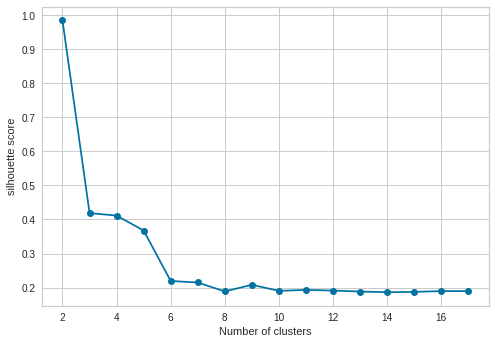

In [94]:
# plot
plt.plot(range_n_clusters, Silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

In [0]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabaz', timings=False, locate_elbow=True
)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1f25a7da0>,
                 k=None, metric=None, model=None, timings=False)

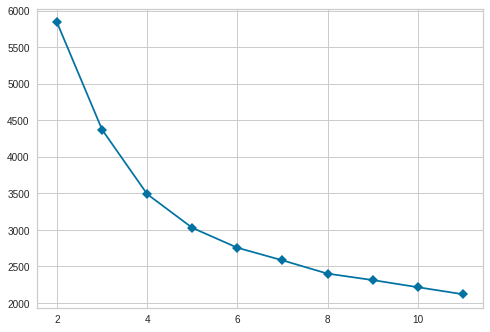

In [96]:
visualizer.fit(dfwords)

In [97]:
print(visualizer)

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1f25a7da0>,
                 k=None, metric=None, model=None, timings=False)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared):

Let's see if we can test scaled data on this in order to improve our understanding of the data. and hopefully reach a positive then negative elbow.

In [98]:
#Calinski-Harabasz score
range_n_clusters = list (range(2,18))
c_h=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    predch = clusterer.fit_predict(dfwords)
    centers = clusterer.cluster_centers_

    scorech = calinski_harabasz_score(dfwords, predch)
    print("For n_clusters = {}, calinski_harabasz_score is {})".format(n_clusters, scorech))
    c_h.append(scorech)


For n_clusters = 2, calinski_harabasz_score is 5838.13427268293)
For n_clusters = 3, calinski_harabasz_score is 4371.477678609014)
For n_clusters = 4, calinski_harabasz_score is 3489.9096769788835)
For n_clusters = 5, calinski_harabasz_score is 3028.6236792323843)
For n_clusters = 6, calinski_harabasz_score is 2756.631784128809)
For n_clusters = 7, calinski_harabasz_score is 2584.127750463042)
For n_clusters = 8, calinski_harabasz_score is 2402.2813410430354)
For n_clusters = 9, calinski_harabasz_score is 2314.3168670013556)
For n_clusters = 10, calinski_harabasz_score is 2216.712069863036)
For n_clusters = 11, calinski_harabasz_score is 2120.7926730085787)
For n_clusters = 12, calinski_harabasz_score is 2050.111471219576)
For n_clusters = 13, calinski_harabasz_score is 1974.238236565664)
For n_clusters = 14, calinski_harabasz_score is 1890.512625158453)
For n_clusters = 15, calinski_harabasz_score is 1833.4724903392912)
For n_clusters = 16, calinski_harabasz_score is 1792.526054673904

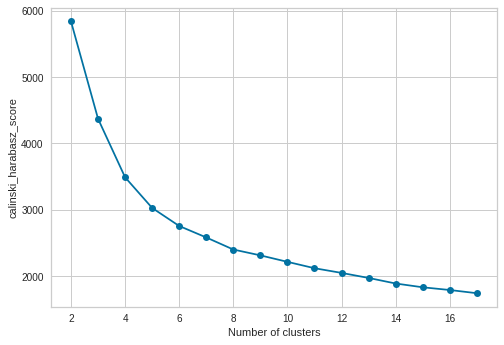

In [99]:
# plot
plt.plot(range_n_clusters, c_h, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

In [100]:
#Calinski-Harabasz score
range_n_clusters = list (range(2,18))
c_hs=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    predch2 = clusterer.fit_predict(dfwordsscaled)
    centers2 = clusterer.cluster_centers_

    scorech2 = calinski_harabasz_score(dfwordsscaled, predch2)
    print("For n_clusters = {}, calinski_harabasz_score is {})".format(n_clusters, scorech2))
    c_hs.append(scorech2)


For n_clusters = 2, calinski_harabasz_score is 1648.0197604976102)
For n_clusters = 3, calinski_harabasz_score is 1295.7832847184682)
For n_clusters = 4, calinski_harabasz_score is 1191.190106089056)
For n_clusters = 5, calinski_harabasz_score is 1121.841606822406)
For n_clusters = 6, calinski_harabasz_score is 1094.1892101361705)
For n_clusters = 7, calinski_harabasz_score is 1029.5796324478247)
For n_clusters = 8, calinski_harabasz_score is 999.7588552311356)
For n_clusters = 9, calinski_harabasz_score is 985.6200074369644)
For n_clusters = 10, calinski_harabasz_score is 961.1431667603291)
For n_clusters = 11, calinski_harabasz_score is 923.3140716622382)
For n_clusters = 12, calinski_harabasz_score is 905.2223701322092)
For n_clusters = 13, calinski_harabasz_score is 876.3752398913075)
For n_clusters = 14, calinski_harabasz_score is 862.1116541637639)
For n_clusters = 15, calinski_harabasz_score is 846.4523353076115)
For n_clusters = 16, calinski_harabasz_score is 849.9863855336338)

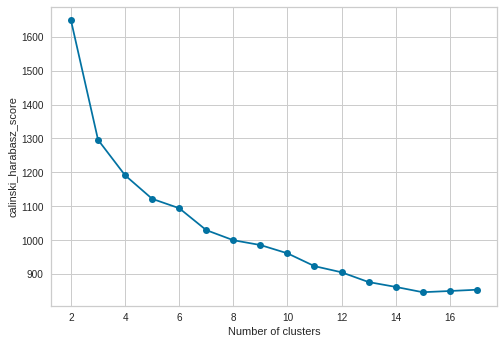

In [101]:
# plot
plt.plot(range_n_clusters, c_hs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

In [102]:
#Calinski-Harabasz score
range_n_clusters = list (range(2,16))
c_h3=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    predch3 = clusterer.fit_predict(dfabs)
    centers3 = clusterer.cluster_centers_

    scorech3 = calinski_harabasz_score(dfabs, predch3)
    print("For n_clusters = {}, calinski_harabasz_score is {})".format(n_clusters, scorech3))
    c_h3.append(scorech3)


For n_clusters = 2, calinski_harabasz_score is 2709.6812109683433)
For n_clusters = 3, calinski_harabasz_score is 2171.104194728011)
For n_clusters = 4, calinski_harabasz_score is 1941.1132818862227)
For n_clusters = 5, calinski_harabasz_score is 1782.0248721825874)
For n_clusters = 6, calinski_harabasz_score is 1712.8099246781549)
For n_clusters = 7, calinski_harabasz_score is 1636.5340314460857)
For n_clusters = 8, calinski_harabasz_score is 1584.0285986710542)
For n_clusters = 9, calinski_harabasz_score is 1532.6489528822535)
For n_clusters = 10, calinski_harabasz_score is 1496.976681811489)
For n_clusters = 11, calinski_harabasz_score is 1436.2943918509102)
For n_clusters = 12, calinski_harabasz_score is 1403.3026371171459)
For n_clusters = 13, calinski_harabasz_score is 1395.7383253746696)
For n_clusters = 14, calinski_harabasz_score is 1354.052372057026)
For n_clusters = 15, calinski_harabasz_score is 1325.8110069990528)


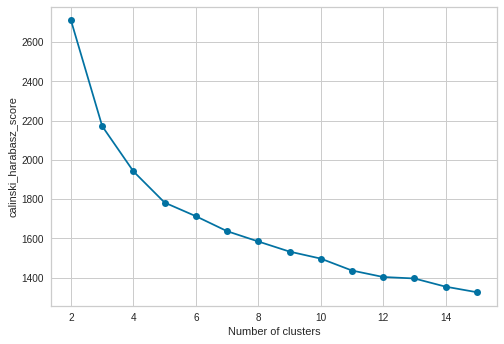

In [103]:
# plot
plt.plot(range_n_clusters, c_h3, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

In [104]:
#davies_bouldin_score
range_n_clusters = list (range(2,16))
db=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    preddb = clusterer.fit_predict(dfwordsscaled)
    centerdb = clusterer.cluster_centers_

    scoredb = davies_bouldin_score(dfwordsscaled, preddb)
    print("For n_clusters = {}, davies_bouldin_score is {})".format(n_clusters, scoredb))
    db.append(scoredb)


For n_clusters = 2, davies_bouldin_score is 3.437584544828728)
For n_clusters = 3, davies_bouldin_score is 3.6969802162755028)
For n_clusters = 4, davies_bouldin_score is 2.782898186265374)
For n_clusters = 5, davies_bouldin_score is 2.744341057422438)
For n_clusters = 6, davies_bouldin_score is 2.5662048409909275)
For n_clusters = 7, davies_bouldin_score is 2.501957499448283)
For n_clusters = 8, davies_bouldin_score is 2.504868925052537)
For n_clusters = 9, davies_bouldin_score is 2.349634305767536)
For n_clusters = 10, davies_bouldin_score is 2.2751260177878425)
For n_clusters = 11, davies_bouldin_score is 2.302952919256312)
For n_clusters = 12, davies_bouldin_score is 2.226774939021073)
For n_clusters = 13, davies_bouldin_score is 2.1400989624594273)
For n_clusters = 14, davies_bouldin_score is 2.1271614317964462)
For n_clusters = 15, davies_bouldin_score is 2.1275159623113358)


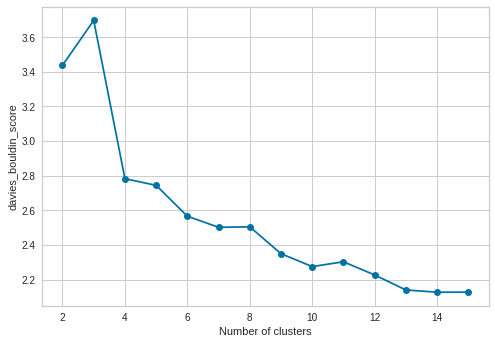

In [105]:
# plot
plt.plot(range_n_clusters, db, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('davies_bouldin_score')
plt.show()

for a David Bouldin score we need to get a value that is minimized and close to 0 for optimal intra cluster separation distance. Lets take a step batch and try a deifferent clustering algorithm, BIRCH.

# BIRCH on dfwords

In [106]:
#BIRCH with calinski_harabasz_score
range_n_clusters = list (range(2,14))
birchch=[]
for n_clusters in range_n_clusters:
    clusterer = Birch(n_clusters=n_clusters)
    predch4 = clusterer.fit_predict(dfwords)
    centers4 = clusterer.subcluster_centers_

    scorech4 = calinski_harabasz_score(dfwords, predch4)
    print("For n_clusters = {}, calinski_harabasz_score is {})".format(n_clusters, scorech4))
    birchch.append(scorech4)

For n_clusters = 2, calinski_harabasz_score is 5838.13427268293)
For n_clusters = 3, calinski_harabasz_score is 3880.747426424826)
For n_clusters = 4, calinski_harabasz_score is 3099.8511035319525)
For n_clusters = 5, calinski_harabasz_score is 2643.3723480857025)
For n_clusters = 6, calinski_harabasz_score is 2367.5236836302242)
For n_clusters = 7, calinski_harabasz_score is 2165.2534161055078)
For n_clusters = 8, calinski_harabasz_score is 2031.4464237524487)
For n_clusters = 9, calinski_harabasz_score is 1893.4142095215957)
For n_clusters = 10, calinski_harabasz_score is 1778.8358451281927)
For n_clusters = 11, calinski_harabasz_score is 1688.6085227754527)
For n_clusters = 12, calinski_harabasz_score is 1619.3486411328458)
For n_clusters = 13, calinski_harabasz_score is 1565.248848438887)


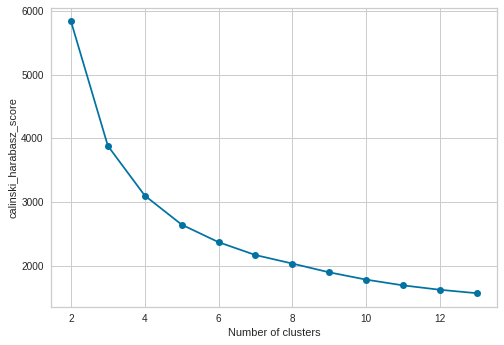

In [107]:
# plot
plt.plot(range_n_clusters, birchch, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

It turns out Birch is not great with more than 20 dimensions and unfortunately we are dealing with over 30 variables so this is not a good idea. Let's try mini batchKmeans.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans

#Minibatchkmeans (worked)

In [108]:
dfwordsscaled.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2.704052e-14,-2.330839e-16,1.003252e-14,4.090942e-15,1.402178e-14,1.550438e-15,-1.042129e-16,-2.791499e-15,8.804790e-16,-3.902316e-15,8.368073e-15,7.804627e-16,5.210192e-15,-1.856775e-14,-4.411682e-15,-1.849220e-14,-3.621399e-16,-4.247832e-15,-2.998890e-15,3.552965e-15,1.801611e-15,1.967911e-15,1.902004e-15,3.451757e-16,1.532770e-15,9.749116e-15,-9.736022e-16,-2.112029e-14,-1.183242e-14,-1.432802e-14,-3.393087e-14,-1.677602e-14,-3.443779e-15,-3.203401e-16,1.261689e-15,-1.083258e-15
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,2.093406e-01,-3.377929e-01,3.980781e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,1.729137e+01,3.046682e+01,2.884728e+01,2.517666e+01,2.202956e+01,1.012836e+02,3.381064e+01,2.060662e+01,5.084490e+01,2.543952e+01,5.872572e+01,3.817464e+01,5.051496e+01,2.881419e+01,5.846820e+01,

In [140]:
minwords=scalermin.fit_transform(dfwords)
minwords

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.06666667, 0.        , ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.06666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.08333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [110]:
df_minwords=pd.DataFrame(minwords, columns=dfwords.columns)
df_minwords.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,0.011139,0.016820,0.008251,0.009482,0.010224,0.004335,0.011848,0.006558,0.005822,0.011664,0.017937,0.001837,0.007844,0.012660,0.003969,0.014172,0.004539,0.003691,0.011529,0.011587,0.005890,0.005640,0.003736,0.001939,0.011421,0.012330,0.000303,0.021447,0.032091,0.018562,0.007763,0.006396,0.008368,0.00816,0.010996,0.003777
std,0.033529,0.047024,0.033971,0.043512,0.045710,0.016677,0.057148,0.032608,0.034464,0.039257,0.044580,0.009855,0.029345,0.047915,0.019590,0.038752,0.016951,0.026099,0.019568,0.034304,0.017003,0.018955,0.019390,0.018604,0.029675,0.049937,0.005940,0.057980,0.065854,0.059080,0.038531,0.034944,0.028387,0.03120,0.049891,0.021595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [135]:
dfabs.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,0.011139,0.016820,0.008251,0.009482,0.010224,0.004335,0.011848,0.006558,0.005822,0.011664,0.017937,0.001837,0.007844,0.012660,0.003969,0.014172,0.004539,0.003691,0.011529,0.011587,0.005890,0.005640,0.003736,0.001939,0.011421,0.012330,0.000303,0.021447,0.032091,0.018562,0.007763,0.006396,0.008368,0.00816,0.010996,0.003777
std,0.033529,0.047024,0.033971,0.043512,0.045710,0.016677,0.057148,0.032608,0.034464,0.039257,0.044580,0.009855,0.029345,0.047915,0.019590,0.038752,0.016951,0.026099,0.019568,0.034304,0.017003,0.018955,0.019390,0.018604,0.029675,0.049937,0.005940,0.057980,0.065854,0.059080,0.038531,0.034944,0.028387,0.03120,0.049891,0.021595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


it appears MaxAbsScaler produces the same result and MinMaxScaler since we are dealing with purely discreet data. so leaving dfabs out makes sense.

In [174]:
rob=RobustScaler().fit_transform(dfwords)
rob

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.]])

In [175]:
dfrob=pd.DataFrame(rob, columns=dfwords.columns)
dfrob.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


I have my scaled data sets now we can test each.

In [111]:
#minibatch distortion with elbow method for min max scaled
range_n_clusters = list (range(2,14))
mini1=[]
for n_clusters in range_n_clusters:
    clusterermb1 = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    predmb1 = clusterermb1.fit_predict(df_minwords)
    centersmb1 = clusterermb1.cluster_centers_

    scoremb1=clusterermb1.inertia_
    print("For n_clusters = {}, distortion is {})".format(n_clusters, scoremb1))
    mini1.append(scoremb1)

For n_clusters = 2, distortion is 1354.3870250584682)
For n_clusters = 3, distortion is 1303.2049088192466)
For n_clusters = 4, distortion is 1266.8768692706312)
For n_clusters = 5, distortion is 1237.206567712801)
For n_clusters = 6, distortion is 1198.7454697769856)
For n_clusters = 7, distortion is 1179.7966182760656)
For n_clusters = 8, distortion is 1116.8786760846501)
For n_clusters = 9, distortion is 1078.7198648137905)
For n_clusters = 10, distortion is 1048.0034486435397)
For n_clusters = 11, distortion is 1017.138176985964)
For n_clusters = 12, distortion is 1043.5905191516813)
For n_clusters = 13, distortion is 980.0383336325327)


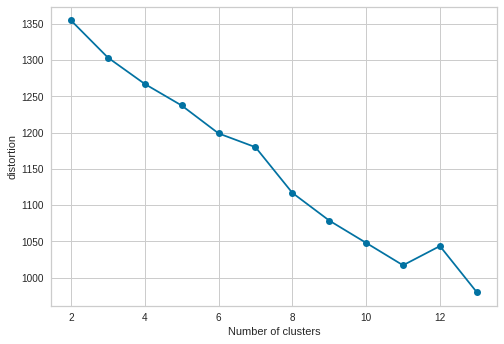

In [112]:
# plot
plt.plot(range(2, 14), mini1, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.show()

these are promising results k=6 here

In [118]:
#minibatch silhouette with elbow method for min max scaled
range_n_clusters = list (range(2,14))
mini1s=[]
for n_clusters in range_n_clusters:
    clusterermb1s = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    predmb1s = clusterermb1s.fit_predict(df_minwords)
    centersmb1s = clusterermb1s.cluster_centers_

    scoremb1s = silhouette_score(df_minwords, predmb1s, random_state=0)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, scoremb1s))
    mini1s.append(scoremb1s)

For n_clusters = 2, silhouette score is 0.39538414648508435
For n_clusters = 3, silhouette score is 0.3559110157113332
For n_clusters = 4, silhouette score is 0.3056586164301238
For n_clusters = 5, silhouette score is 0.20362659713836614
For n_clusters = 6, silhouette score is 0.11304490092326441
For n_clusters = 7, silhouette score is 0.22981191921662475
For n_clusters = 8, silhouette score is 0.2714462305216804
For n_clusters = 9, silhouette score is 0.19293797642304036
For n_clusters = 10, silhouette score is 0.3021299596776515
For n_clusters = 11, silhouette score is 0.2088567276492192
For n_clusters = 12, silhouette score is 0.05627979091000078
For n_clusters = 13, silhouette score is 0.20751530502931811


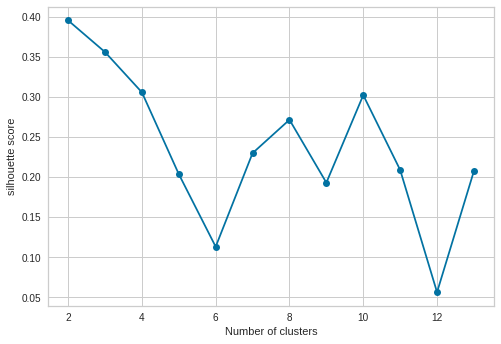

In [128]:
# plot
plt.plot(range_n_clusters, mini1s, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

Interesting it looks like k=8 is optimal here. Since k=8 is a possiblity for minimizing the change in distortion score, k=8 is the best choice of the number of clusters.

In [115]:
#minibatch with elbow method for standard scaler
range_n_clusters = list (range(2,14))
mini2=[]
for n_clusters in range_n_clusters:
    clusterermb2 = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    predmb2 = clusterermb2.fit_predict(dfwordsscaled)
    centersmb2 = clusterermb2.cluster_centers_

    scoremb2=clusterermb2.inertia_
    print("For n_clusters = {}, distortion is {})".format(n_clusters, scoremb2))
    mini2.append(scoremb2)

For n_clusters = 2, distortion is 1033965.3062830747)
For n_clusters = 3, distortion is 1004512.1929828227)
For n_clusters = 4, distortion is 988129.9741683715)
For n_clusters = 5, distortion is 971649.8530794405)
For n_clusters = 6, distortion is 962430.5331815993)
For n_clusters = 7, distortion is 944352.8991789988)
For n_clusters = 8, distortion is 946297.0757206929)
For n_clusters = 9, distortion is 901690.4720401437)
For n_clusters = 10, distortion is 917866.2669967152)
For n_clusters = 11, distortion is 881150.187661259)
For n_clusters = 12, distortion is 884782.3841804466)
For n_clusters = 13, distortion is 863142.5115610312)


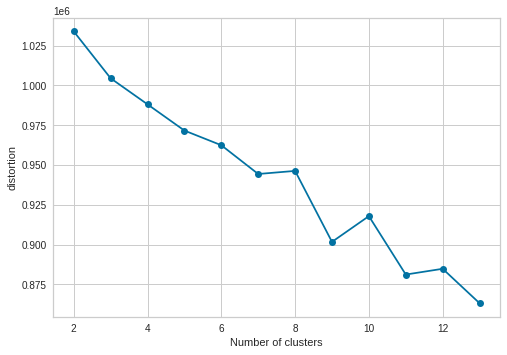

In [116]:
# plot
plt.plot(range(2, 14), mini2, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.show()

chaotic results but k=7 here

In [117]:
#minibatch silhouette with elbow method for min max scaled
range_n_clusters = list (range(2,14))
mini2s=[]
for n_clusters in range_n_clusters:
    clusterermb2s = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    predmb2s = clusterermb2s.fit_predict(dfwordsscaled)
    centersmb2s = clusterermb2s.cluster_centers_

    scoremb2s = silhouette_score(dfwordsscaled, predmb2s, random_state=0)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, scoremb2s))
    mini2s.append(scoremb2s)

For n_clusters = 2, silhouette score is 0.45915430690704345
For n_clusters = 3, silhouette score is 0.39227423082162505
For n_clusters = 4, silhouette score is 0.3517602748443654
For n_clusters = 5, silhouette score is 0.20630242187226425
For n_clusters = 6, silhouette score is 0.058121603052701615
For n_clusters = 7, silhouette score is 0.05336411895890107
For n_clusters = 8, silhouette score is 0.08652443802174935
For n_clusters = 9, silhouette score is 0.1567005141706457
For n_clusters = 10, silhouette score is 0.07356508594383825
For n_clusters = 11, silhouette score is 0.20844090729924794
For n_clusters = 12, silhouette score is 0.09412866686202102
For n_clusters = 13, silhouette score is 0.1450824810228962


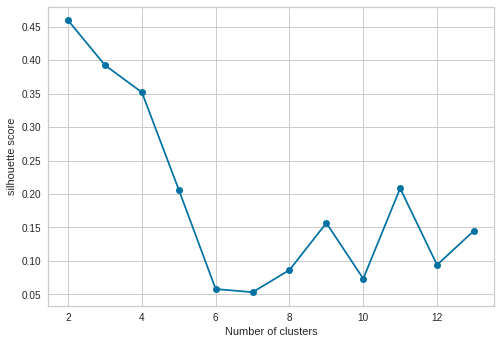

In [126]:
# plot
plt.plot(range(2, 14), mini2s, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

it looks like k=9 is the local optima here. Since k=9 is also a possiblity for minimizing the change in distortion. k=9 is therefore the best choice.

In [122]:
#minibatch with elbow method for no scaler
range_n_clusters = list (range(2,14))
mini3=[]
for n_clusters in range_n_clusters:
    clusterermb3 = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    predmb3 = clusterermb3.fit_predict(dfwords)
    centersmb3 = clusterermb3.cluster_centers_

    scoremb3=clusterermb3.inertia_
    print("For n_clusters = {}, distortion is {})".format(n_clusters, scoremb3))
    mini3.append(scoremb3)

For n_clusters = 2, distortion is 620945.6811818923)
For n_clusters = 3, distortion is 610681.1594836033)
For n_clusters = 4, distortion is 595271.975659481)
For n_clusters = 5, distortion is 581952.7188771154)
For n_clusters = 6, distortion is 580371.8262050381)
For n_clusters = 7, distortion is 552999.1454554374)
For n_clusters = 8, distortion is 546414.7078697251)
For n_clusters = 9, distortion is 555420.3993414451)
For n_clusters = 10, distortion is 540164.2752764582)
For n_clusters = 11, distortion is 527687.7763643094)
For n_clusters = 12, distortion is 499865.2490702589)
For n_clusters = 13, distortion is 524113.774482194)


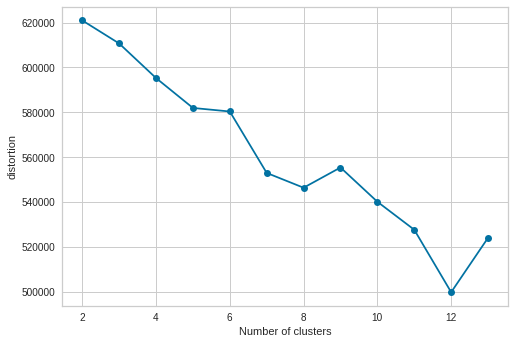

In [123]:
# plot
plt.plot(range(2, 14), mini3, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.show()

chaotic results again but k=5 here

In [124]:
#minibatch silhouette with elbow method for no scaler
range_n_clusters = list (range(2,14))
mini3s=[]
for n_clusters in range_n_clusters:
    clusterermb3s = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    predmb3s = clusterermb3s.fit_predict(dfwords)
    centersmb3s = clusterermb3s.cluster_centers_

    scoremb3s = silhouette_score(dfwords, predmb3s, random_state=0)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, scoremb3s))
    mini3s.append(scoremb3s)

For n_clusters = 2, silhouette score is 0.40274171089359984
For n_clusters = 3, silhouette score is 0.4446846091705427
For n_clusters = 4, silhouette score is 0.24165677219362341
For n_clusters = 5, silhouette score is 0.37676921211358894
For n_clusters = 6, silhouette score is 0.12933509858957393
For n_clusters = 7, silhouette score is 0.18928288347760683
For n_clusters = 8, silhouette score is 0.19529320530053923
For n_clusters = 9, silhouette score is 0.1012761529635048
For n_clusters = 10, silhouette score is 0.10909053478239861
For n_clusters = 11, silhouette score is 0.22418792457200287
For n_clusters = 12, silhouette score is 0.18104459538884674
For n_clusters = 13, silhouette score is 0.10530607636401097


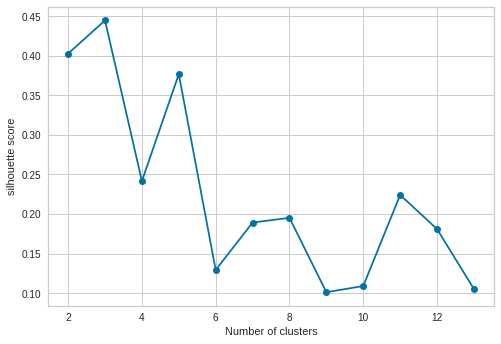

In [127]:
# plot
plt.plot(range(2, 14), mini3s, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

We are looking for the first local optima k=3 here. However, since k=5 is another local optima here and a place where the distortion begins to experience diminishing returns k=5 is the best choice.

In [160]:
#minibatch with elbow method for robust scaler
range_n_clusters = list (range(2,14))
mini4=[]
for n_clusters in range_n_clusters:
    clusterermb4 = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    predmb4 = clusterermb4.fit_predict(dfrob)
    centersmb4 = clusterermb4.cluster_centers_

    scoremb4=clusterermb4.inertia_
    print("For n_clusters = {}, distortion is {})".format(n_clusters, scoremb4))
    mini4.append(scoremb4)

For n_clusters = 2, distortion is 620945.6811818923)
For n_clusters = 3, distortion is 610681.1594836033)
For n_clusters = 4, distortion is 595271.975659481)
For n_clusters = 5, distortion is 581952.7188771154)
For n_clusters = 6, distortion is 580371.8262050381)
For n_clusters = 7, distortion is 552999.1454554374)
For n_clusters = 8, distortion is 546414.7078697251)
For n_clusters = 9, distortion is 555420.3993414451)
For n_clusters = 10, distortion is 540164.2752764582)
For n_clusters = 11, distortion is 527687.7763643094)
For n_clusters = 12, distortion is 499865.2490702589)
For n_clusters = 13, distortion is 524113.774482194)


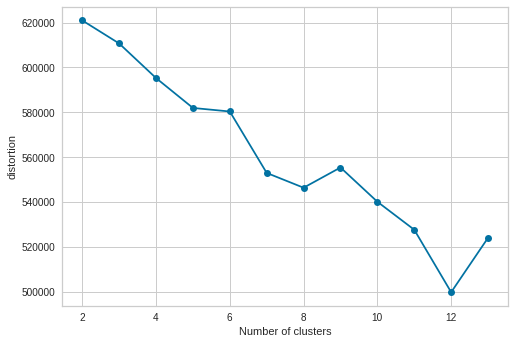

In [161]:
# plot
plt.plot(range(2, 14), mini4, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('distortion')
plt.show()

In [164]:
#minibatch silhouette with elbow method for robust scaler
range_n_clusters = list (range(2,14))
mini4s=[]
for n_clusters in range_n_clusters:
    clusterermb4s = MiniBatchKMeans(n_clusters=n_clusters, random_state=0)
    predmb4s = clusterermb4s.fit_predict(dfrob)
    centersmb4s = clusterermb4s.cluster_centers_

    scoremb4s = silhouette_score(dfrob, predmb4s, random_state=0)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, scoremb4s))
    mini4s.append(scoremb4s)

For n_clusters = 2, silhouette score is 0.40274171089359984
For n_clusters = 3, silhouette score is 0.4446846091705427
For n_clusters = 4, silhouette score is 0.24165677219362341
For n_clusters = 5, silhouette score is 0.37676921211358894
For n_clusters = 6, silhouette score is 0.12933509858957393
For n_clusters = 7, silhouette score is 0.18928288347760683
For n_clusters = 8, silhouette score is 0.19529320530053923
For n_clusters = 9, silhouette score is 0.1012761529635048
For n_clusters = 10, silhouette score is 0.10909053478239861
For n_clusters = 11, silhouette score is 0.22418792457200287
For n_clusters = 12, silhouette score is 0.18104459538884674
For n_clusters = 13, silhouette score is 0.10530607636401097


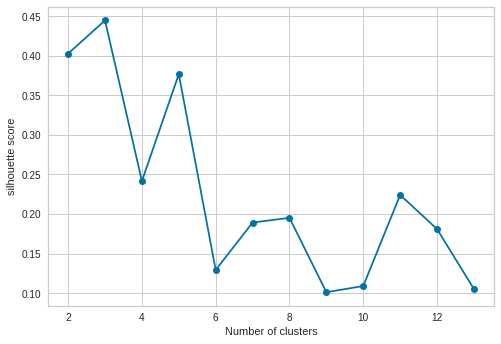

In [165]:
# plot
plt.plot(range(2, 14), mini4s, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

We are looking for the first local optima k=3 here. However, since k=5 is another local optima here and a place where the distortion begins to experience diminishing returns k=5 is the best choice.

In [131]:
dfwords.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [132]:
df_minwords.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,0.011139,0.016820,0.008251,0.009482,0.010224,0.004335,0.011848,0.006558,0.005822,0.011664,0.017937,0.001837,0.007844,0.012660,0.003969,0.014172,0.004539,0.003691,0.011529,0.011587,0.005890,0.005640,0.003736,0.001939,0.011421,0.012330,0.000303,0.021447,0.032091,0.018562,0.007763,0.006396,0.008368,0.00816,0.010996,0.003777
std,0.033529,0.047024,0.033971,0.043512,0.045710,0.016677,0.057148,0.032608,0.034464,0.039257,0.044580,0.009855,0.029345,0.047915,0.019590,0.038752,0.016951,0.026099,0.019568,0.034304,0.017003,0.018955,0.019390,0.018604,0.029675,0.049937,0.005940,0.057980,0.065854,0.059080,0.038531,0.034944,0.028387,0.03120,0.049891,0.021595
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.012658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [133]:
dfwordsscaled.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2.704052e-14,-2.330839e-16,1.003252e-14,4.090942e-15,1.402178e-14,1.550438e-15,-1.042129e-16,-2.791499e-15,8.804790e-16,-3.902316e-15,8.368073e-15,7.804627e-16,5.210192e-15,-1.856775e-14,-4.411682e-15,-1.849220e-14,-3.621399e-16,-4.247832e-15,-2.998890e-15,3.552965e-15,1.801611e-15,1.967911e-15,1.902004e-15,3.451757e-16,1.532770e-15,9.749116e-15,-9.736022e-16,-2.112029e-14,-1.183242e-14,-1.432802e-14,-3.393087e-14,-1.677602e-14,-3.443779e-15,-3.203401e-16,1.261689e-15,-1.083258e-15
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,-5.891613e-01,-3.377929e-01,-3.464106e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,-2.011306e-01,-1.689389e-01,-2.971234e-01,-4.023622e-01,-1.863843e-01,-2.673227e-01,-2.642250e-01,-2.026194e-01,-3.657176e-01,-2.677948e-01,-1.414211e-01,2.093406e-01,-3.377929e-01,3.980781e-01,-2.975568e-01,-1.926539e-01,-1.042472e-01,-3.848725e-01,-2.469059e-01,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,1.729137e+01,3.046682e+01,2.884728e+01,2.517666e+01,2.202956e+01,1.012836e+02,3.381064e+01,2.060662e+01,5.084490e+01,2.543952e+01,5.872572e+01,3.817464e+01,5.051496e+01,2.881419e+01,5.846820e+01,

In [166]:
dfrob.describe()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,0.104933,0.087333,0.139967,0.322867,0.209400,0.141200,0.126600,0.103200,0.425167,0.299600,0.040600,0.737833,0.243333,0.465300,0.248167,0.112067,0.021333,0.422567,0.110967,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,0.521726,0.516961,0.471080,0.802441,1.123504,0.528209,0.479145,0.509338,1.162574,1.118786,0.287091,1.252366,0.720375,1.343226,0.834028,0.581709,0.204645,1.097958,0.449436,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,16.000000,15.000000,12.000000,18.000000,114.000000,18.000000,10.000000,26.000000,30.000000,66.000000,11.000000,64.000000,21.000000,79.000000,44.000000,30.000000,11.000000,37.000000,9.000000,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

an explanation of different scalers

# Interpretation of Results

Based on all of these results, it makes the most sense to proceed with MinMaxScaler() or better known as df_minwords. Which utilizes kmeanminibatch with k=8 clusters. The data includes all 30,000 rows, it features a constant maximum value of 1.0 and a minimum of 0.0 while maintaining a different mean/ standard deviation for each feature.

In [0]:
kbest=MiniBatchKMeans(n_clusters=8, random_state=0)

In [184]:
kbest.fit(df_minwords)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=8, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [0]:
df_minwords['cluster']=kbest.labels_

In [193]:
df_minwords.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.033333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,2
1,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.031250,0.095238,0.012658,0.0,0.0,0.0,0.162162,0.444444,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,7
2,0.0,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.030303,0.0,0.015625,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.071429,0.000,0.0000,2
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055556,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.047619,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000,0.0000,2
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.008772,0.0,0.0,0.192308,0.033333,0.015152,0.0,0.046875,0.000000,0.012658,0.0,0.0,0.0,0.027027,0.000000,0.0,0.000000,0.181818,0.0,0.0,0.0,0.0,0.000000,0.125,0.0625,4


In [194]:
results=df_minwords.groupby('cluster').mean()
results

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.030170,0.018960,0.020424,0.061204,0.015690,0.006514,0.005780,0.018618,0.016159,0.074406,0.016420,0.001879,0.007814,0.008940,0.005069,0.015453,0.004572,0.002943,0.014571,0.015304,0.007107,0.006989,0.004226,0.002172,0.014289,0.008307,0.000370,0.017052,0.037870,0.010886,0.025990,0.024037,0.009354,0.009249,0.005154,0.004383
1,0.018300,0.035670,0.009273,0.014054,0.010525,0.006369,0.321094,0.011356,0.005627,0.013948,0.032030,0.002635,0.011127,0.019742,0.007538,0.022508,0.004097,0.002211,0.011870,0.017440,0.007660,0.008486,0.003910,0.002471,0.018018,0.017008,0.000879,0.035646,0.067629,0.028612,0.023685,0.020029,0.009169,0.009299,0.010908,0.005097
2,0.006219,0.005669,0.005600,0.002329,0.004136,0.003197,0.003063,0.003260,0.003935,0.002305,0.011745,0.001123,0.006166,0.005391,0.001881,0.010220,0.004024,0.003666,0.009633,0.008411,0.005086,0.004214,0.003409,0.001784,0.006328,0.006282,0.000143,0.009419,0.014663,0.004572,0.002229,0.001571,0.006557,0.006547,0.004109,0.001902
3,0.031303,0.029573,0.013200,0.039668,0.321429,0.007858,0.011681,0.010256,0.008376,0.029060,0.026638,0.001889,0.008974,0.020256,0.005917,0.017350,0.003458,0.002564,0.012099,0.013675,0.007043,0.008741,0.004444,0.002797,0.017602,0.015954,0.000604,0.029701,0.058508,0.027564,0.011681,0.012179,0.007226,0.008974,0.008333,0.004006
4,0.014412,0.021199,0.010744,0.009435,0.008169,0.006614,0.008368,0.008978,0.008368,0.025453,0.032001,0.012430,0.021850,0.014365,0.028752,0.026220,0.009087,0.003423,0.024385,0.041974,0.012305,0.007988,0.005579,0.003677,0.055486,0.028979,0.002307,0.040795,0.033980,0.037308,0.012397,0.012029,0.038671,0.027595,0.244596,0.041579
5,0.016020,0.024987,0.011608,0.013684,0.010270,0.007087,0.014719,0.009592,0.008401,0.015213,0.044875,0.004039,0.022527,0.258643,0.007021,0.035541,0.005875,0.002937,0.016180,0.021155,0.008855,0.007674,0.004685,0.002497,0.023840,0.020463,0.000618,0.040926,0.049200,0.037964,0.020284,0.013732,0.012704,0.010732,0.012722,0.005856
6,0.026341,0.186145,0.014010,0.008696,0.008447,0.004460,0.007440,0.030978,0.007130,0.022536,0.020483,0.002410,0.008647,0.007913,0.003746,0.017159,0.005929,0.004664,0.011916,0.016522,0.006362,0.006877,0.004203,0.002213,0.011140,0.010628,0.000484,0.017246,0.021897,0.014022,0.005507,0.005109,0.007628,0.007516,0.005652,0.002446
7,0.015966,0.017536,0.011192,0.008281,0.008018,0.007810,0.007551,0.006542,0.007686,0.010568,0.044684,0.003156,0.011411,0.013562,0.009242,0.027963,0.006220,0.004744,0.016995,0.016831,0.007312,0.011171,0.004521,0.001931,0.026937,0.047195,0.000529,0.089452,0.125386,0.102435,0.021474,0.016839,0.011695,0.012526,0.009557,0.006523


In [198]:
df_minwords.cluster.value_counts()

2    20534
7     3296
0     2595
6     1150
4      717
1      699
5      619
3      390
Name: cluster, dtype: int64

wow cluster 2 is common. this can be handled with SMOTE if supervised learning is needed.

In [0]:
def topn(n=5):
    out_dict = dict()
    groups = [0, 1, 2, 3, 4, 5, 6, 7]
    for group in groups:
        words_for_group = df_minwords.loc[:,'basketball':'drugs'][dfwords.cluster == group]          # DataFrame word columns for this group
        word_sums = words_for_group.sum()                               # Series containing the sum word counts for each word
        total_words = word_sums.sum()                                   # Total of all words
        word_freq = (word_sums / total_words)                   # frequency of words
        out_dict[group] = pd.Series(                                    # converts the series to a list of tuples and takes
            list(dict((word_freq).nlargest(n))))                        #   the top n values
    return pd.DataFrame(out_dict)                                       # returns the dictionary as a dataframe


In [205]:
topn()

,0,1,2,3,4,5,6,7
0,sports,cheerleading,shopping,volleyball,drunk,hot,football,shopping
1,softball,shopping,cute,shopping,hair,shopping,baseball,clothes
2,shopping,football,dance,softball,rock,cute,basketball,mall
3,basketball,mall,music,basketball,drugs,mall,sports,dress
4,hollister,cute,mall,mall,mall,clothes,shopping,cute


Awesome so we have done it we have found the top 5 word frequencies for each of 8 clusters representing 30,000 data entries.

---



In [0]:
dfwords['cluster']=kbest.labels_

In [208]:
results2=dfwords.groupby('cluster').mean()
results2

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.724085,0.284393,0.551445,1.040462,0.219653,0.201927,0.052023,0.297881,0.242389,0.892871,0.295568,0.214258,0.140655,0.089403,0.131792,0.463584,0.301734,0.032370,0.932563,0.321387,0.561464,0.307514,0.126782,0.023892,0.528709,0.074759,0.121002,0.204624,0.416570,0.087091,0.233911,0.192293,0.205780,0.129480,0.041233,0.070135
1,0.439199,0.535050,0.250358,0.238913,0.147353,0.197425,2.889843,0.181688,0.084406,0.167382,0.576538,0.300429,0.200286,0.197425,0.195994,0.675250,0.270386,0.024320,0.759657,0.366237,0.605150,0.373391,0.117310,0.027182,0.666667,0.153076,0.287554,0.427754,0.743920,0.228898,0.213162,0.160229,0.201717,0.130186,0.087268,0.081545
2,0.149265,0.085030,0.151213,0.039593,0.057904,0.099104,0.027564,0.052157,0.059024,0.027661,0.211405,0.128032,0.110987,0.053911,0.048895,0.306613,0.265608,0.040323,0.616538,0.176634,0.401773,0.185400,0.102269,0.019626,0.234148,0.056540,0.046654,0.113032,0.161293,0.036573,0.020064,0.012565,0.144249,0.091653,0.032872,0.030437
3,0.751282,0.443590,0.356410,0.674359,4.500000,0.243590,0.105128,0.164103,0.125641,0.348718,0.479487,0.215385,0.161538,0.202564,0.153846,0.520513,0.228205,0.028205,0.774359,0.287179,0.556410,0.384615,0.133333,0.030769,0.651282,0.143590,0.197436,0.356410,0.643590,0.220513,0.105128,0.097436,0.158974,0.125641,0.066667,0.064103
4,0.345886,0.317992,0.290098,0.160391,0.114365,0.205021,0.075314,0.143654,0.125523,0.305439,0.576011,1.417015,0.393305,0.143654,0.747559,0.786611,0.599721,0.037657,1.560669,0.881450,0.972106,0.351464,0.167364,0.040446,2.052999,0.260809,0.754533,0.489540,0.373780,0.298466,0.111576,0.096234,0.850767,0.386332,1.956764,0.665272
5,0.384491,0.374798,0.313409,0.232633,0.143780,0.219709,0.132472,0.153473,0.126010,0.182553,0.807754,0.460420,0.405493,2.586430,0.182553,1.066236,0.387722,0.032310,1.035541,0.444265,0.699515,0.337641,0.140549,0.027464,0.882068,0.184168,0.201939,0.491115,0.541195,0.303716,0.182553,0.109855,0.279483,0.150242,0.101777,0.093700
6,0.632174,2.792174,0.378261,0.147826,0.118261,0.138261,0.066957,0.495652,0.106957,0.270435,0.368696,0.274783,0.155652,0.079130,0.097391,0.514783,0.391304,0.051304,0.762609,0.346957,0.502609,0.302609,0.126087,0.024348,0.412174,0.095652,0.158261,0.206957,0.240870,0.112174,0.049565,0.040870,0.167826,0.105217,0.045217,0.039130
7,0.383192,0.263046,0.302184,0.140777,0.112257,0.242112,0.067961,0.104672,0.115291,0.126820,0.804308,0.359830,0.205400,0.135619,0.240291,0.838896,0.410498,0.052184,1.087682,0.353459,0.577670,0.491505,0.135619,0.021238,0.996663,0.424757,0.172937,1.073422,1.379248,0.819478,0.193265,0.134709,0.257282,0.175364,0.076456,0.104369


In [209]:
dfwords.cluster.value_counts()

2    20534
7     3296
0     2595
6     1150
4      717
1      699
5      619
3      390
Name: cluster, dtype: int64

In [0]:
def topn2(n=5):
    out_dict = dict()
    groups = [0, 1, 2, 3, 4, 5, 6, 7]
    for group in groups:
        words_for_group2 = dfwords.loc[:,'basketball':'drugs'][dfwords.cluster == group]          # DataFrame word columns for this group
        word_sums2 = words_for_group2.sum()                               # Series containing the sum word counts for each word
        total_words2 = word_sums2.sum()                                   # Total of all words
        word_freq2 = (word_sums2 / total_words2)                   # frequency of words
        out_dict[group] = pd.Series(                                    # converts the series to a list of tuples and takes
            list(dict((word_freq2).nlargest(n))))                        #   the top n values
    return pd.DataFrame(out_dict)                                       # returns the dictionary as a dataframe


In [213]:
topn2()

,0,1,2,3,4,5,6,7
0,softball,cheerleading,music,volleyball,hair,hot,football,shopping
1,music,music,god,music,drunk,dance,music,music
2,sports,shopping,dance,basketball,music,music,basketball,mall
3,basketball,dance,band,softball,sex,hair,dance,hair
4,god,hair,hair,hair,god,cute,god,dance


Awesome so we have done it we have found the top 5 word frequencies for each of 8 clusters representing 30,000 data entries. This version is for the non scaled dataframe.